                                    ***Sakib Mizan_A_2154901009 ML Final Project***

### Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [8]:
dataset = pd.read_csv('14-StudentsPerformance.csv')
dataset.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [9]:
dataset.shape

(1000, 8)

### Check Dataset for Missing Values

In [10]:
missing_data = dataset.isnull().sum()
print(missing_data)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


### Checking for Duplicate Data

In [11]:
duplicate_data = dataset.duplicated().sum()
print(duplicate_data)

0


### Checking Data Type

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking for Unique Entities

In [13]:
dataset.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Statistical Overview of the Dataset

In [14]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Assigning Independent variables to x & Dependent variables to y

In [15]:
x = dataset.drop("test preparation course", axis=1)

x.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75


In [16]:
y = dataset["test preparation course"]

y.head()

0         none
1    completed
2         none
3         none
4         none
Name: test preparation course, dtype: object

### Categorical Columns vs Target Class

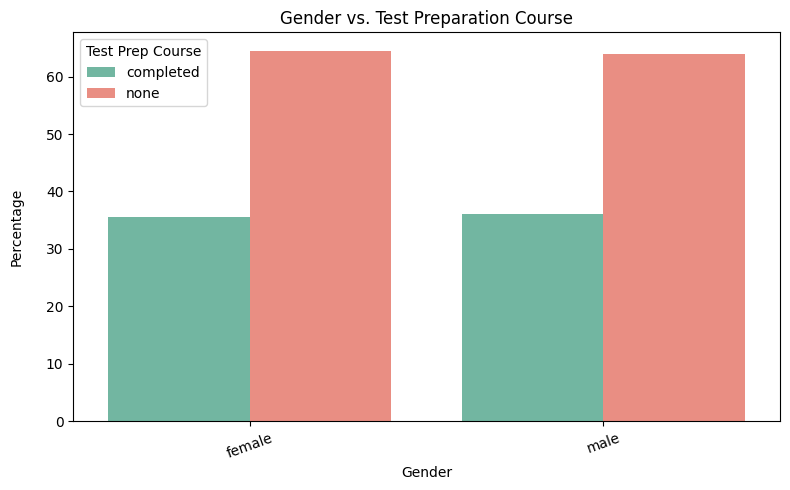

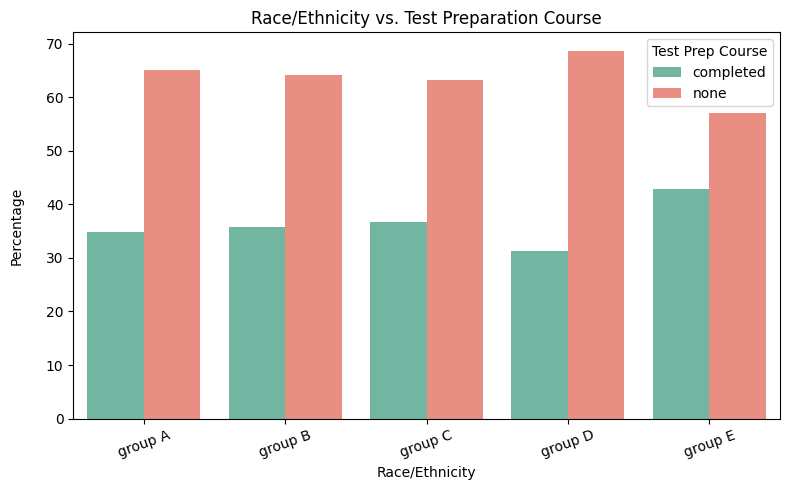

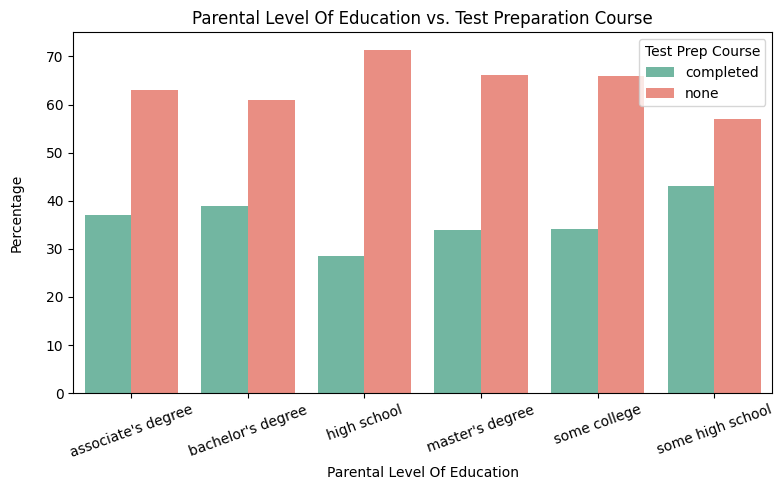

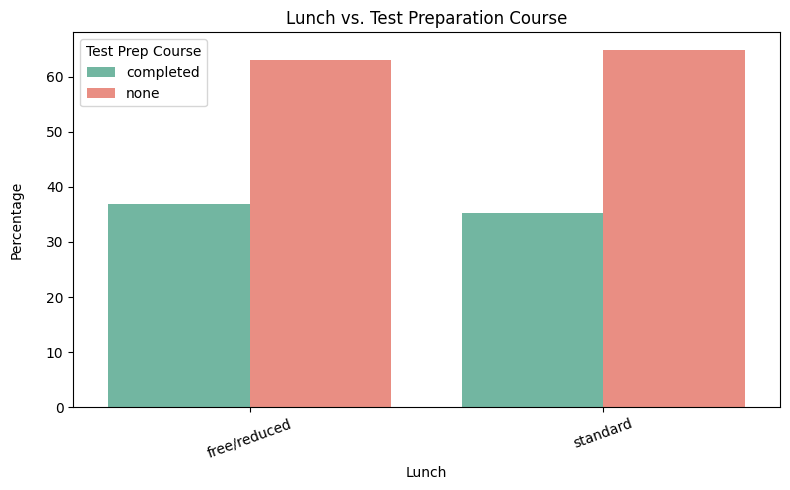

In [17]:
dataset_plot = dataset.copy()
dataset_plot['test preparation course'] = dataset_plot['test preparation course'].astype(str)

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']

for col in categorical_cols:
    plot_data = (
        dataset_plot.groupby([col, 'test preparation course'])
        .size()
        .reset_index(name='count')
    )
    
    total_per_cat = plot_data.groupby(col)['count'].transform('sum')
    plot_data['percent'] = (plot_data['count'] / total_per_cat * 100).round(2)

    plt.figure(figsize=(8, 5))
    sns.barplot(data=plot_data, x=col, y='percent', hue='test preparation course', palette=['#66c2a5', 'salmon'])
    plt.title(f"{col.title()} vs. Test Preparation Course")
    plt.ylabel("Percentage\n")
    plt.xlabel(col.title())
    plt.xticks(rotation=20)
    plt.legend(title='Test Prep Course')
    plt.tight_layout()
    plt.show()


### Numerical Columns vs Target Class

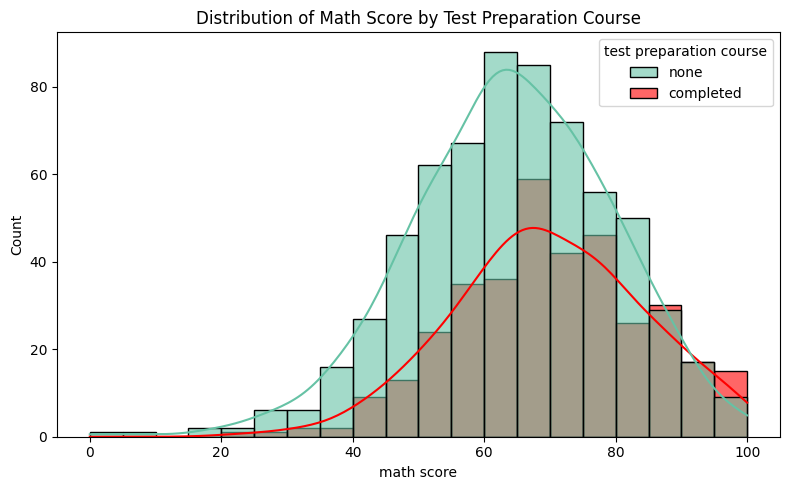

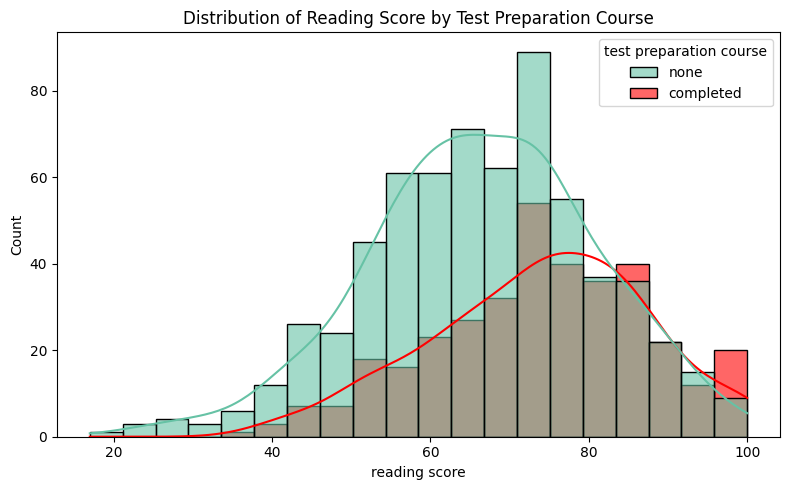

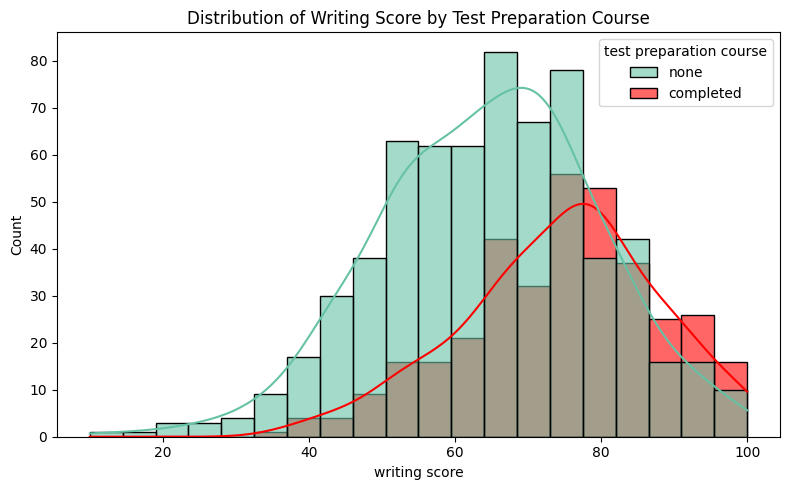

In [18]:
numerical_cols = ['math score', 'reading score', 'writing score']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=dataset, x=col, hue='test preparation course', kde=True, bins=20, palette=['#66c2a5', 'red'], alpha=0.6)
    plt.title(f"Distribution of {col.title()} by Test Preparation Course")
    plt.tight_layout()
    plt.show()


### Checking Target Class Imbalance

Class distribution:
test preparation course
none         642
completed    358
Name: count, dtype: int64


Class Percentages:
test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64


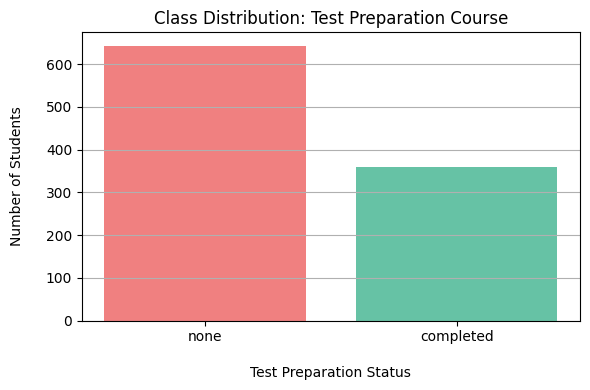

In [19]:
target_counts = dataset['test preparation course'].value_counts()
print("Class distribution:")
print(target_counts)

print("\n\nClass Percentages:")
print(dataset["test preparation course"].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color=['lightcoral', '#66c2a5'])

plt.title("Class Distribution: Test Preparation Course")
plt.xlabel("\nTest Preparation Status")
plt.ylabel("Number of Students\n")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Visualizing Boxplot for Numerical Columns

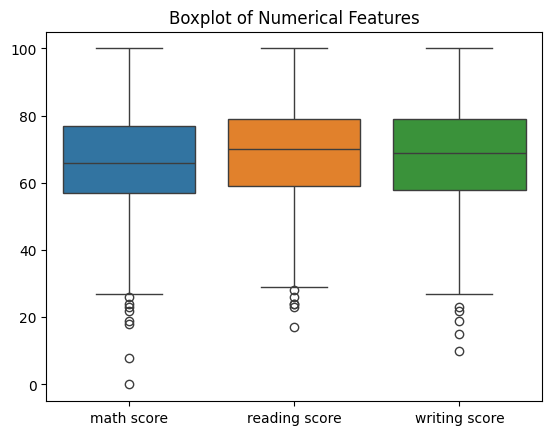

In [20]:
numerical_cols = dataset.select_dtypes(include=['number']).columns
sns.boxplot(data=dataset[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.show()

### Scaling Numeric Columns

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[["math score", "reading score", "writing score"]] = scaler.fit_transform(dataset[["math score", "reading score", "writing score"]])

dataset.describe()

,math score,reading score,writing score
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,8.704149e-17,2.167155e-16,-1.350031e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.360728e+00,-3.574960e+00,-3.822345e+00
25%,-5.997164e-01,-6.968462e-01,-6.784278e-01
50%,-5.872457e-03,5.694554e-02,6.228578e-02
75%,7.199368e-01,6.736842e-01,7.206978e-01
max,2.237538e+00,2.112741e+00,2.103363e+00


### Visualizing Boxplot after Feature Scaling

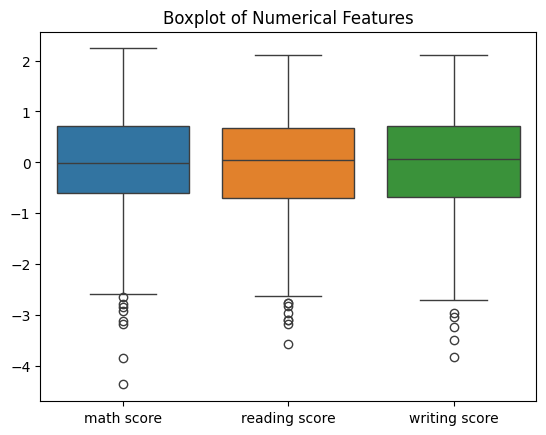

In [22]:
numerical_cols = dataset.select_dtypes(include=['number']).columns
sns.boxplot(data=dataset[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.show()

### Encoding Independent variables

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop = 'first'), [0, 1, 2, 3])], remainder='passthrough')    #use OneHotEncoder(drop = 'first') which Drops first category for each of 4 categorical variables to avoid dummy variable trap
x = pd.DataFrame(ct.fit_transform(x), columns = ct.get_feature_names_out())

print(pd.DataFrame(x))
#print(x)

     encoder__gender_male  encoder__race/ethnicity_group B  \
0                     0.0                              1.0   
1                     0.0                              0.0   
2                     0.0                              1.0   
3                     1.0                              0.0   
4                     1.0                              0.0   
..                    ...                              ...   
995                   0.0                              0.0   
996                   1.0                              0.0   
997                   0.0                              0.0   
998                   0.0                              0.0   
999                   0.0                              0.0   

     encoder__race/ethnicity_group C  encoder__race/ethnicity_group D  \
0                                0.0                              0.0   
1                                1.0                              0.0   
2                                0.0

### Encoding Dependent variables

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) #assigned 0 & 1 in alphabetical order thus 0 = completed & 1 = none

print(pd.DataFrame(y))
#print(y)

     0
0    1
1    0
2    1
3    1
4    1
..  ..
995  0
996  1
997  0
998  0
999  1

[1000 rows x 1 columns]


### Splitting Data into Training & Testing set

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 14), (200, 14), (800,), (200,))

### Building Optimal Model using statsmodel.api

### Training model on the Training Set

In [26]:
import statsmodels.api as sm
x_train_opt = sm.add_constant(x_train)
x_train_opt = x_train_opt.astype(np.float64)
model_train = sm.Logit(y_train, x_train_opt).fit()

print(model_train.summary())

Optimization terminated successfully.
         Current function value: 0.494277
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      785
Method:                           MLE   Df Model:                           14
Date:                Sat, 05 Jul 2025   Pseudo R-squ.:                  0.2357
Time:                        12:19:25   Log-Likelihood:                -395.42
converged:                       True   LL-Null:                       -517.34
Covariance Type:            nonrobust   LLR p-value:                 5.424e-44
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const               

### Feature Importance

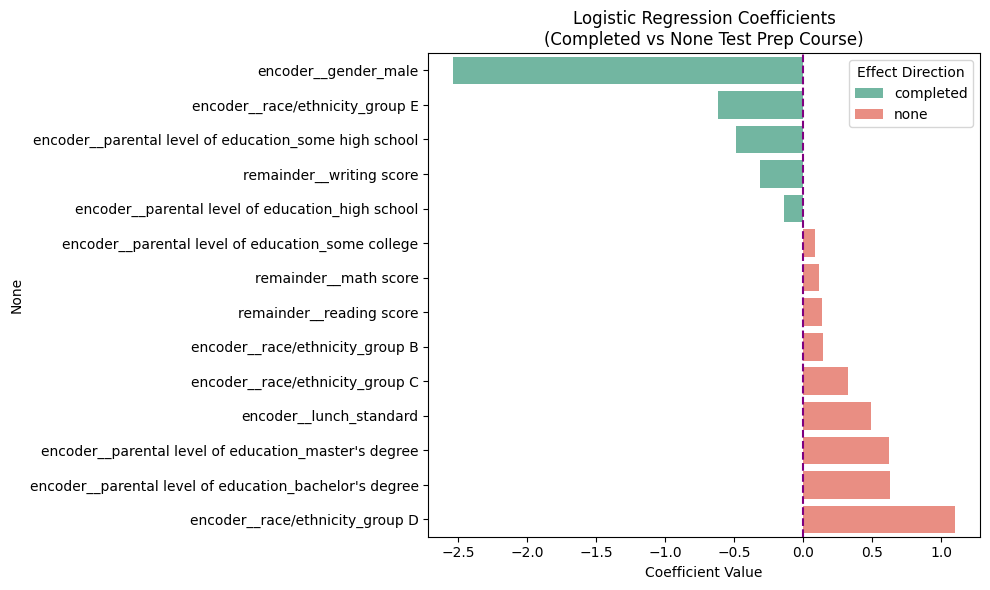

In [27]:
summary_dataset = model_train.summary2().tables[1].copy()
summary_dataset = summary_dataset.drop('const', errors='ignore')

summary_dataset['sign'] = summary_dataset['Coef.'].apply(lambda x: 'none' if x > 0 else 'completed')
summary_dataset = summary_dataset.sort_values(by='Coef.')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coef.', y=summary_dataset.index, data=summary_dataset, hue='sign', dodge=False, palette={'none': 'salmon', 'completed': '#66c2a5'})
plt.axvline(0, color='purple', linestyle='--')
plt.legend(title='Effect Direction')
plt.title("Logistic Regression Coefficients\n(Completed vs None Test Prep Course)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


### Evaluating Performance & Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.54      0.61        79
           1       0.74      0.84      0.79       121

    accuracy                           0.72       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.72      0.72      0.72       200

Confusion Matrix:
 [[ 43  36]
 [ 19 102]]


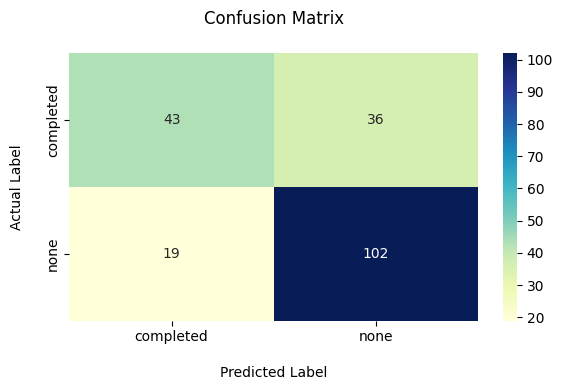

In [28]:
x_test_opt = sm.add_constant(x_test).astype(np.float64)
y_pred = model_train.predict(x_test_opt)
y_pred_class = (y_pred > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### ROC Curve & AUC Score

AUC Score: 0.8038497750810755


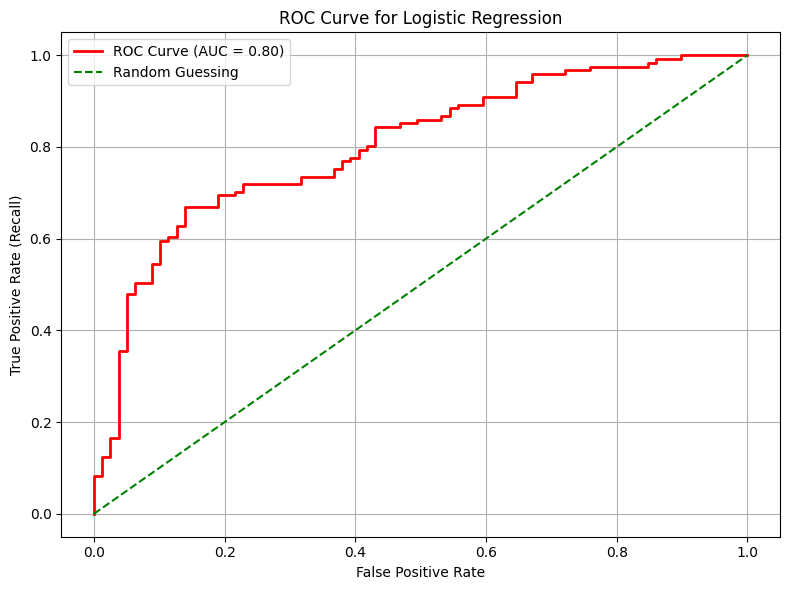

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Best Threshold

Best Threshold:  0.76
Best F1-Score:  0.74


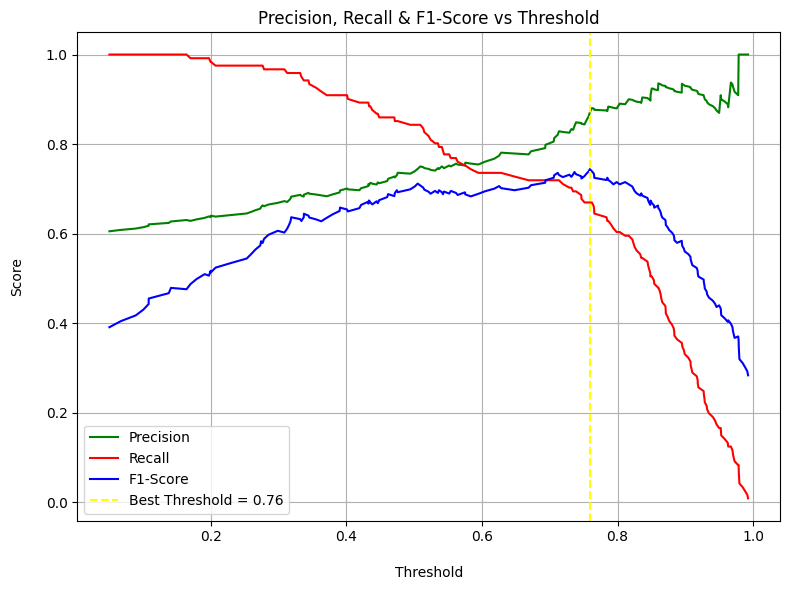

In [30]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
macro_f1_scores = [f1_score(y_test, (y_pred > t).astype(int), average='macro') for t in thresholds]

best_index = np.argmax(macro_f1_scores)
best_threshold = thresholds[best_index]
best_f1_score = macro_f1_scores[best_index]

print(f"Best Threshold: {best_threshold: .2f}")
print(f"Best F1-Score: {best_f1_score: .2f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label = 'Precision', color = 'green')
plt.plot(thresholds, recall[:-1], label = 'Recall', color = 'red')
plt.plot(thresholds, macro_f1_scores, label = 'F1-Score', color = 'blue')
plt.axvline(x = best_threshold, color = 'yellow', linestyle = '--', label = f'Best Threshold = {best_threshold:.2f}')
plt.xlabel("\nThreshold")
plt.ylabel("Score\n")
plt.title("Precision, Recall & F1-Score vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Evaluating Performance & Convolution Matrix using Best Threshold

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        79
           1       0.88      0.67      0.76       121

    accuracy                           0.74       200
   macro avg       0.76      0.77      0.74       200
weighted avg       0.78      0.74      0.75       200

Confusion Matrix:
 [[68 11]
 [40 81]]


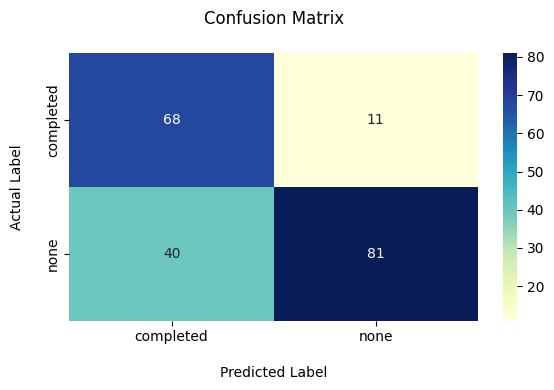

In [31]:
y_pred_class = (y_pred > best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### Middle Threshold

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.73      0.68        79
           1       0.81      0.72      0.76       121

    accuracy                           0.72       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.74      0.72      0.73       200

Confusion Matrix:
 [[58 21]
 [34 87]]


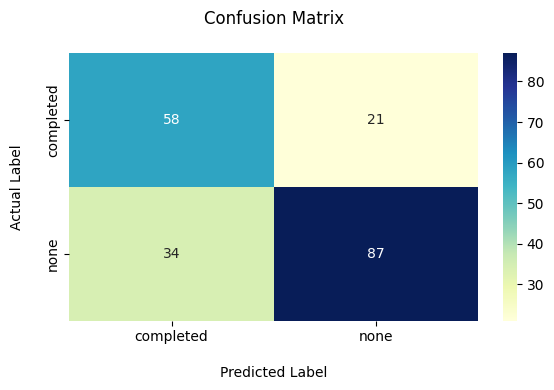

In [32]:
y_pred_class = (y_pred > 0.70).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### Threshold Impact on Logistic Regression Performance Before Imbalance Handling

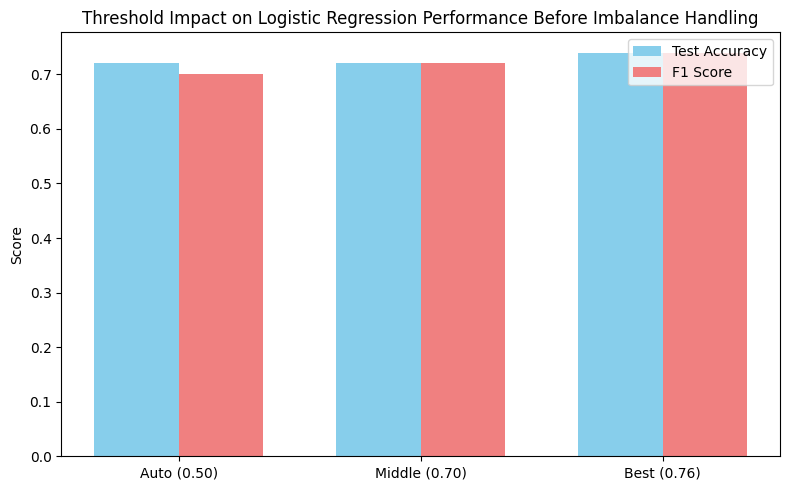

In [33]:
thresholds = ['Auto (0.50)', 'Middle (0.70)', 'Best (0.76)']
acc_values = [0.72, 0.72, 0.74]
f1_values = [0.70, 0.72, 0.74]

x = np.arange(len(thresholds))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, acc_values, width, label='Test Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, f1_values, width, label='F1 Score', color='lightcoral')

ax.set_ylabel('Score')
ax.set_title('Threshold Impact on Logistic Regression Performance Before Imbalance Handling')
ax.set_xticks(x)
ax.set_xticklabels(thresholds)
ax.legend()

plt.tight_layout()
plt.show()

### Handling Class Imbalance

In [34]:
weights = np.where(y_train == 0, 642 / 358, 1)

model_train_weights = sm.GLM(y_train, x_train_opt, family=sm.families.Binomial(), freq_weights=weights).fit()
print(model_train_weights.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  800
Model:                            GLM   Df Residuals:                  1006.33
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -538.05
Date:                Sat, 05 Jul 2025   Deviance:                       1076.1
Time:                        12:19:27   Pearson chi2:                     996.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3457
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

### Feature Importance After Imbalance Handling

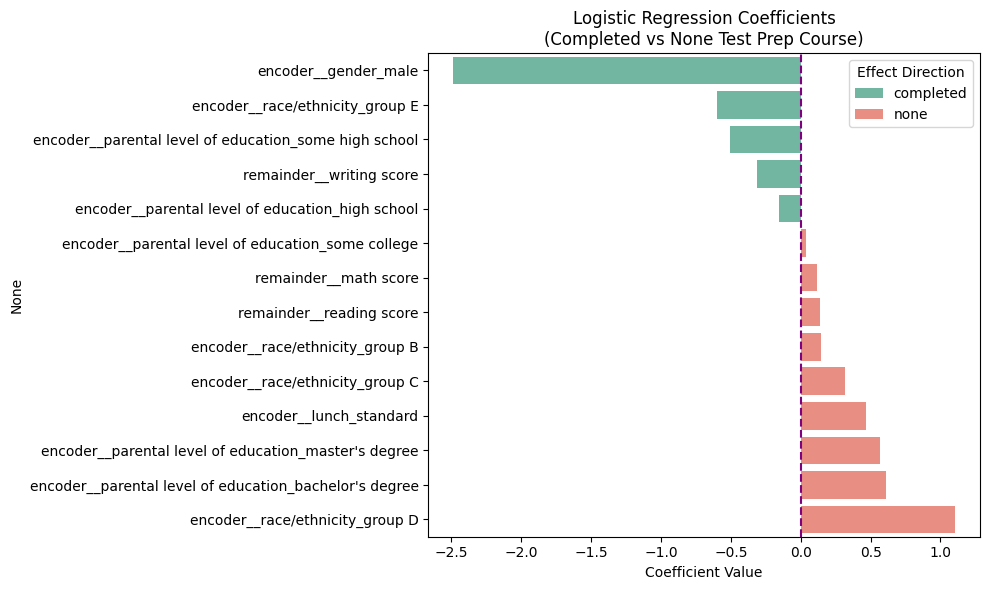

In [35]:
summary_dataset_weights = model_train_weights.summary2().tables[1].copy()
summary_dataset_weights = summary_dataset_weights.drop('const', errors='ignore')

summary_dataset_weights['sign'] = summary_dataset_weights['Coef.'].apply(lambda x: 'none' if x > 0 else 'completed')
summary_dataset_weights = summary_dataset_weights.sort_values(by='Coef.')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coef.', y=summary_dataset_weights.index, data=summary_dataset_weights, hue='sign', dodge=False, palette={'none': 'salmon', 'completed': '#66c2a5'})
plt.axvline(0, color='purple', linestyle='--')
plt.legend(title='Effect Direction')
plt.title("Logistic Regression Coefficients\n(Completed vs None Test Prep Course)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


### Evaluating Performance & Confusion Matrix after Handling Class Imbalance

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        79
           1       0.78      0.73      0.75       121

    accuracy                           0.71       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.72      0.71      0.71       200

Confusion Matrix:
 [[54 25]
 [33 88]]


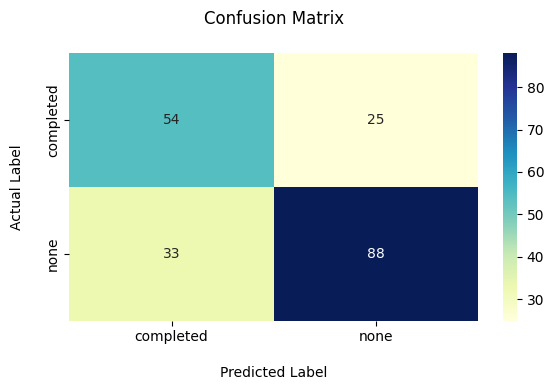

In [36]:
y_pred_weights = model_train_weights.predict(x_test_opt)
y_pred_class_weights = (y_pred_weights > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class_weights))

cm = confusion_matrix(y_test, y_pred_class_weights)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### ROC Curve & AUC Score After Handling Imbalance

AUC Score: 0.8023851867350141


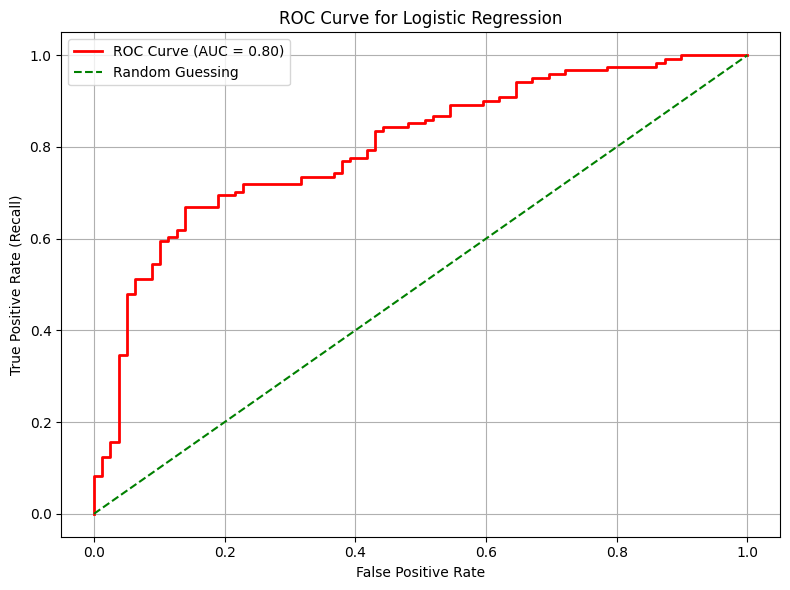

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_weights)
auc_score_weights = roc_auc_score(y_test, y_pred_weights)
print("AUC Score:", auc_score_weights)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', linewidth=2, label=f'ROC Curve (AUC = {auc_score_weights:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Best Threshold after Imbalance Handling

Best Threshold:  0.64
Best F1-Score:  0.74


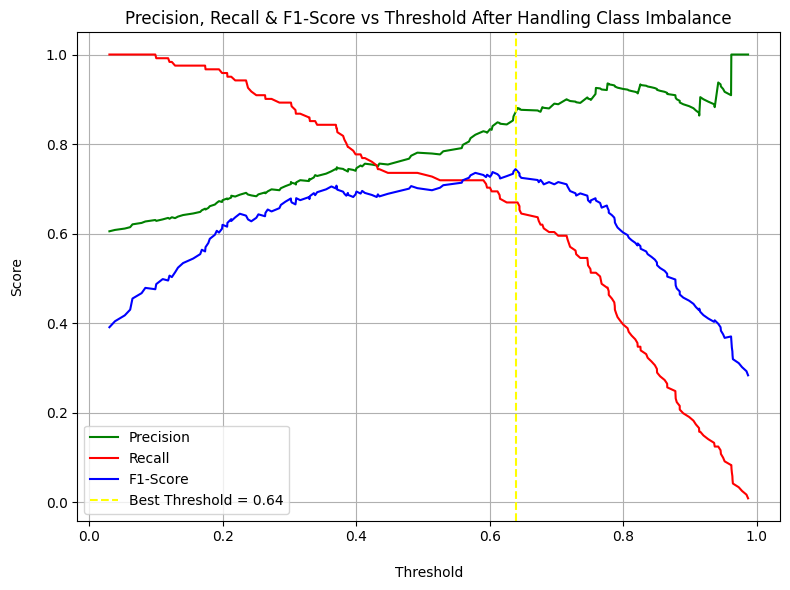

In [38]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_weights)
macro_f1_scores_weights = [f1_score(y_test, (y_pred_weights > t).astype(int), average='macro') for t in thresholds]

best_index_weights = np.argmax(macro_f1_scores_weights)
best_threshold_weights = thresholds[best_index_weights]
best_f1_score_weights = macro_f1_scores_weights[best_index_weights]

print(f"Best Threshold: {best_threshold_weights: .2f}")
print(f"Best F1-Score: {best_f1_score_weights: .2f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label = 'Precision', color = 'green')
plt.plot(thresholds, recall[:-1], label = 'Recall', color = 'red')
plt.plot(thresholds, macro_f1_scores_weights, label = 'F1-Score', color = 'blue')
plt.axvline(x=best_threshold_weights, color = 'yellow', linestyle = '--', label = f'Best Threshold = {best_threshold_weights:.2f}')
plt.xlabel("\nThreshold")
plt.ylabel("Score\n")
plt.title("Precision, Recall & F1-Score vs Threshold After Handling Class Imbalance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Evaluating Performance & Convolution Matrix using Best Threshold After Handling Imbalance

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        79
           1       0.88      0.67      0.76       121

    accuracy                           0.74       200
   macro avg       0.76      0.77      0.74       200
weighted avg       0.78      0.74      0.75       200

Confusion Matrix:
 [[68 11]
 [40 81]]


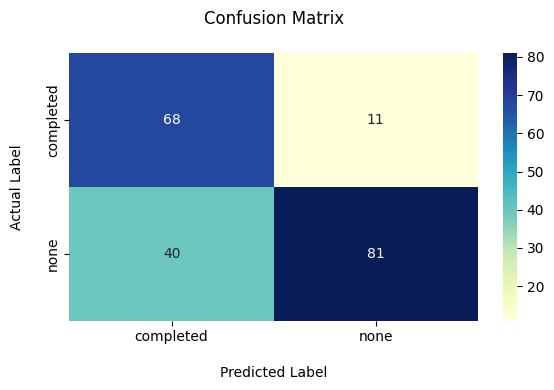

In [39]:
y_pred_weights = model_train_weights.predict(x_test_opt)
y_pred_class_weights = (y_pred_weights > best_threshold_weights).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class_weights))

cm = confusion_matrix(y_test, y_pred_class_weights)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### At Testing Threshold after Imbalance Handling

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        79
           1       0.89      0.60      0.71       121

    accuracy                           0.71       200
   macro avg       0.74      0.74      0.71       200
weighted avg       0.77      0.71      0.71       200

Confusion Matrix:
 [[70  9]
 [49 72]]


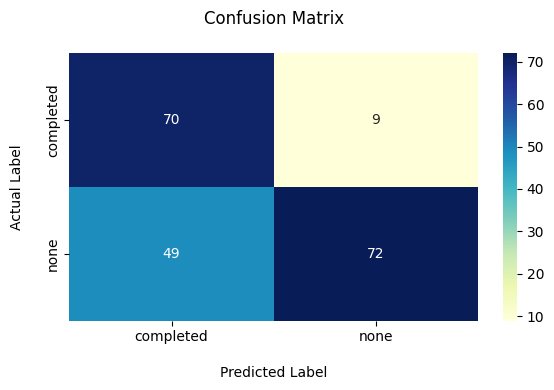

In [40]:
y_pred_weights = model_train_weights.predict(x_test_opt)
y_pred_class_weights = (y_pred_weights > 0.70).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class_weights))

cm = confusion_matrix(y_test, y_pred_class_weights)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### Threshold Impact on Logistic Regression Performance After Imbalance Handling

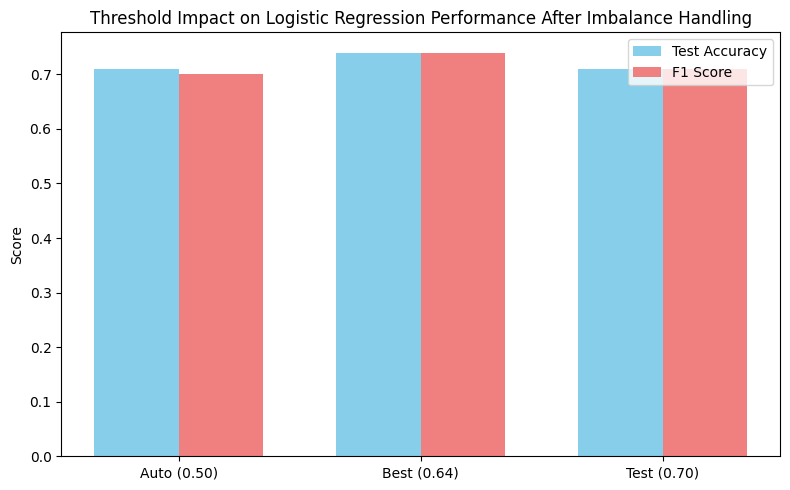

In [41]:
thresholds = ['Auto (0.50)', 'Best (0.64)', 'Test (0.70)']
acc_values = [0.71, 0.74, 0.71]
f1_values = [0.70, 0.74, 0.71]

x = np.arange(len(thresholds))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, acc_values, width, label='Test Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, f1_values, width, label='F1 Score', color='lightcoral')

ax.set_ylabel('Score')
ax.set_title('Threshold Impact on Logistic Regression Performance After Imbalance Handling')
ax.set_xticks(x)
ax.set_xticklabels(thresholds)
ax.legend()

plt.tight_layout()
plt.show()

### Logistic Regression Classification Report Comparison (Before vs. After)

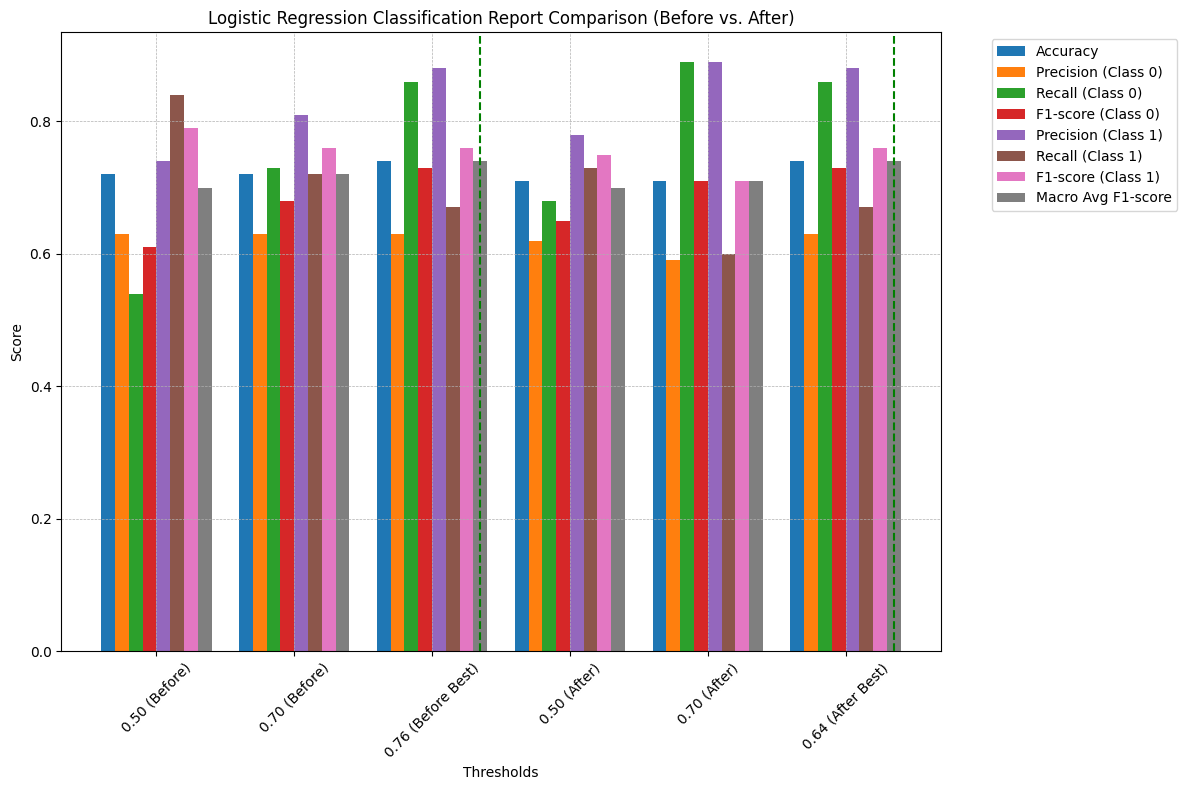

In [42]:
# Data
thresholds = ['0.50 (Before)', '0.70 (Before)', '0.76 (Before Best)', '0.50 (After)', '0.70 (After)', '0.64 (After Best)']
metrics = {
    'Accuracy': [0.72, 0.72, 0.74, 0.71, 0.71, 0.74],
    'Precision (Class 0)': [0.63, 0.63, 0.63, 0.62, 0.59, 0.63],
    'Recall (Class 0)': [0.54, 0.73, 0.86, 0.68, 0.89, 0.86],
    'F1-score (Class 0)': [0.61, 0.68, 0.73, 0.65, 0.71, 0.73],
    'Precision (Class 1)': [0.74, 0.81, 0.88, 0.78, 0.89, 0.88],
    'Recall (Class 1)': [0.84, 0.72, 0.67, 0.73, 0.60, 0.67],
    'F1-score (Class 1)': [0.79, 0.76, 0.76, 0.75, 0.71, 0.76],
    'Macro Avg F1-score': [0.70, 0.72, 0.74, 0.70, 0.71, 0.74]
}

x = np.arange(len(thresholds))
width = 0.1
fig, ax = plt.subplots(figsize=(12, 8))

for i, (metric, values) in enumerate(metrics.items()):
    ax.bar(x + i * width, values, width, label=metric)

ax.set_xlabel('Thresholds')
ax.set_ylabel('Score')
ax.set_title('Logistic Regression Classification Report Comparison (Before vs. After)')
ax.set_xticks(x + width * 3.5)  # Center labels
ax.set_xticklabels(thresholds, rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.axvline(x=2.7, color='green', linestyle='--', label='Best Thresholds')
ax.axvline(x=5.7, color='green', linestyle='--')

plt.tight_layout()
plt.show()

### Model Comparison

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings
import pandas as pd

warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

class_weight = {0: 642 / 358, 1: 1}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight=class_weight),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, class_weight=class_weight),
    'SVM': SVC(random_state=42, class_weight=class_weight, probability=True),
    'KNN (n=5)': KNeighborsClassifier(n_neighbors=5),  # Original KNN
    'KNN (n=7)': KNeighborsClassifier(n_neighbors=7),  # Additional KNN
    'KNN (n=11)': KNeighborsClassifier(n_neighbors=11)  # Additional KNN
}

results = []

for name, model in models.items():
    print(f"Training: {name}")
    
    if 'KNN' in name:
        # For KNN models, create unweighted version (KNN doesn't support class_weight)
        model_no_weights = model.__class__(n_neighbors=model.n_neighbors)
    else:
        # For other models, create unweighted version
        model_no_weights = model.__class__(random_state=42)

    # Train and evaluate unweighted version (before handling imbalance)
    model_no_weights.fit(x_train, y_train)
    y_pred_unweighted = model_no_weights.predict(x_test)
    report_unweighted = classification_report(y_test, y_pred_unweighted, output_dict=True)
    
    # Train and evaluate weighted version (after handling imbalance)
    # Note: KNN will be same as unweighted since it doesn't support class_weight
    if 'KNN' in name:
        model_weighted = model_no_weights  # KNN can't use weights
    else:
        model_weighted = model
    
    model_weighted.fit(x_train, y_train)
    y_pred_weighted = model_weighted.predict(x_test)
    report_weighted = classification_report(y_test, y_pred_weighted, output_dict=True)

    results.append({
        'Model': name,
        'Test Accuracy (Before Handling Imbalance)': f"{report_unweighted['accuracy']:.2f}",
        'Test Accuracy (After Handling Imbalance)': f"{report_weighted['accuracy']:.2f}",
        'F1 Score (Before Handling Imbalance)': f"{f1_score(y_test, y_pred_unweighted):.2f}",
        'F1 Score (After Handling Imbalance)': f"{f1_score(y_test, y_pred_weighted):.2f}"
    })

print("\nModel Comparison Table:")
pd.DataFrame(results)

Training: Decision Tree
Training: Random Forest
Training: SVM
Training: KNN (n=5)
Training: KNN (n=7)
Training: KNN (n=11)

Model Comparison Table:


,Model,Test Accuracy (Before Handling Imbalance),Test Accuracy (After Handling Imbalance),F1 Score (Before Handling Imbalance),F1 Score (After Handling Imbalance)
0,Decision Tree,0.67,0.61,0.74,0.68
1,Random Forest,0.66,0.62,0.75,0.73
2,SVM,0.61,0.66,0.76,0.71
3,KNN (n=5),0.60,0.60,0.71,0.71
4,KNN (n=7),0.58,0.58,0.70,0.70
5,KNN (n=11),0.66,0.66,0.76,0.76


### Test Accuracy Comparison Between Various Models

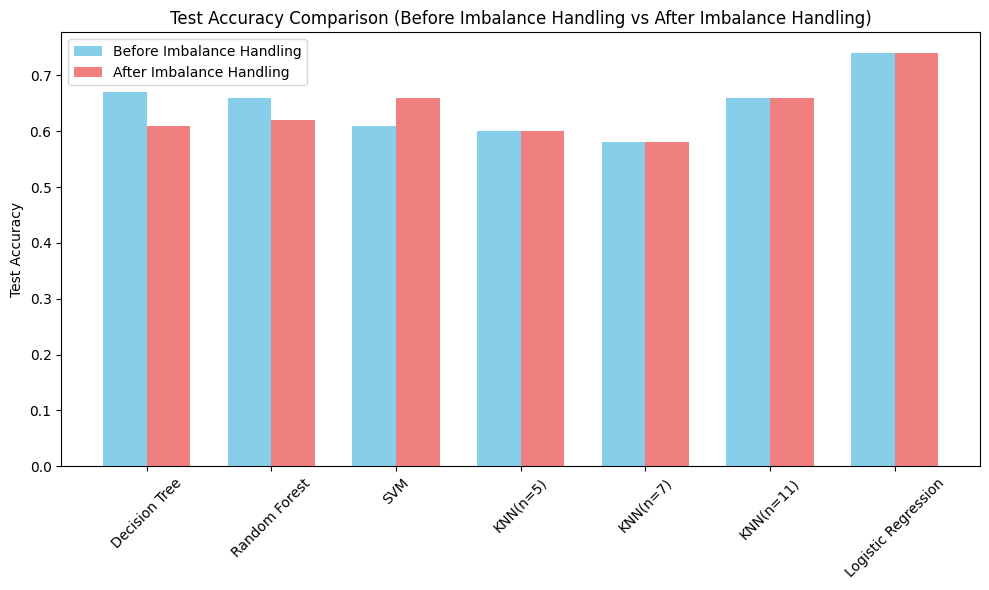

In [44]:
models = ['Decision Tree', 'Random Forest', 'SVM', 'KNN(n=5)', 'KNN(n=7)', 'KNN(n=11)', 'Logistic Regression']
no_weights = [0.67, 0.66, 0.61, 0.60, 0.58, 0.66, 0.74]
with_weights = [0.61, 0.62, 0.66, 0.60, 0.58, 0.66, 0.74]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, no_weights, width, label='Before Imbalance Handling', color='skyblue')
rects2 = ax.bar(x + width/2, with_weights, width, label='After Imbalance Handling', color='lightcoral')

ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy Comparison (Before Imbalance Handling vs After Imbalance Handling)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

### F1 Score Comparison Between Various Models

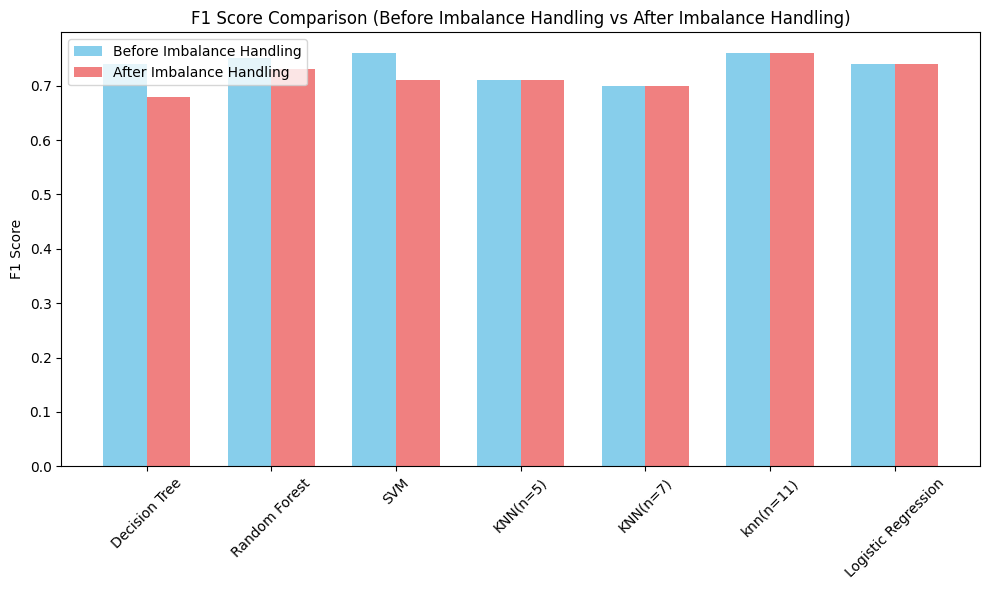

In [45]:
models = ['Decision Tree', 'Random Forest', 'SVM', 'KNN(n=5)', 'KNN(n=7)', 'knn(n=11)', 'Logistic Regression']
no_weights = [0.74, 0.75, 0.76, 0.71, 0.70, 0.76, 0.74]
with_weights = [0.68, 0.73, 0.71, 0.71, 0.70, 0.76, 0.74]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, no_weights, width, label='Before Imbalance Handling', color='skyblue')
rects2 = ax.bar(x + width/2, with_weights, width, label='After Imbalance Handling', color='lightcoral')

ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison (Before Imbalance Handling vs After Imbalance Handling)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

### Cross Validation

x shape: (1000, 14)
y shape: (1000,)
Class weights: {np.int64(1): 1.0, np.int64(0): 1.7932960893854748}
Running CV for statsmodels Logistic Regression

Running CV for scikit-learn Models
Performing cross-validation for: Decision Tree
Performing cross-validation for: Random Forest
Performing cross-validation for: SVM
Performing cross-validation for: KNN (n=5)
Performing cross-validation for: KNN (n=7)
Performing cross-validation for: KNN (n=11)

Cross-Validated Model Comparison:

              Model  Accuracy (Before)  Accuracy (After)  F1 Score (Before)  F1 Score (After)
Logistic Regression               0.72              0.73               0.64              0.64
      Decision Tree               0.60              0.60               0.56              0.57
      Random Forest               0.67              0.67               0.60              0.60
                SVM               0.70              0.70               0.64              0.69
          KNN (n=5)               0.61        

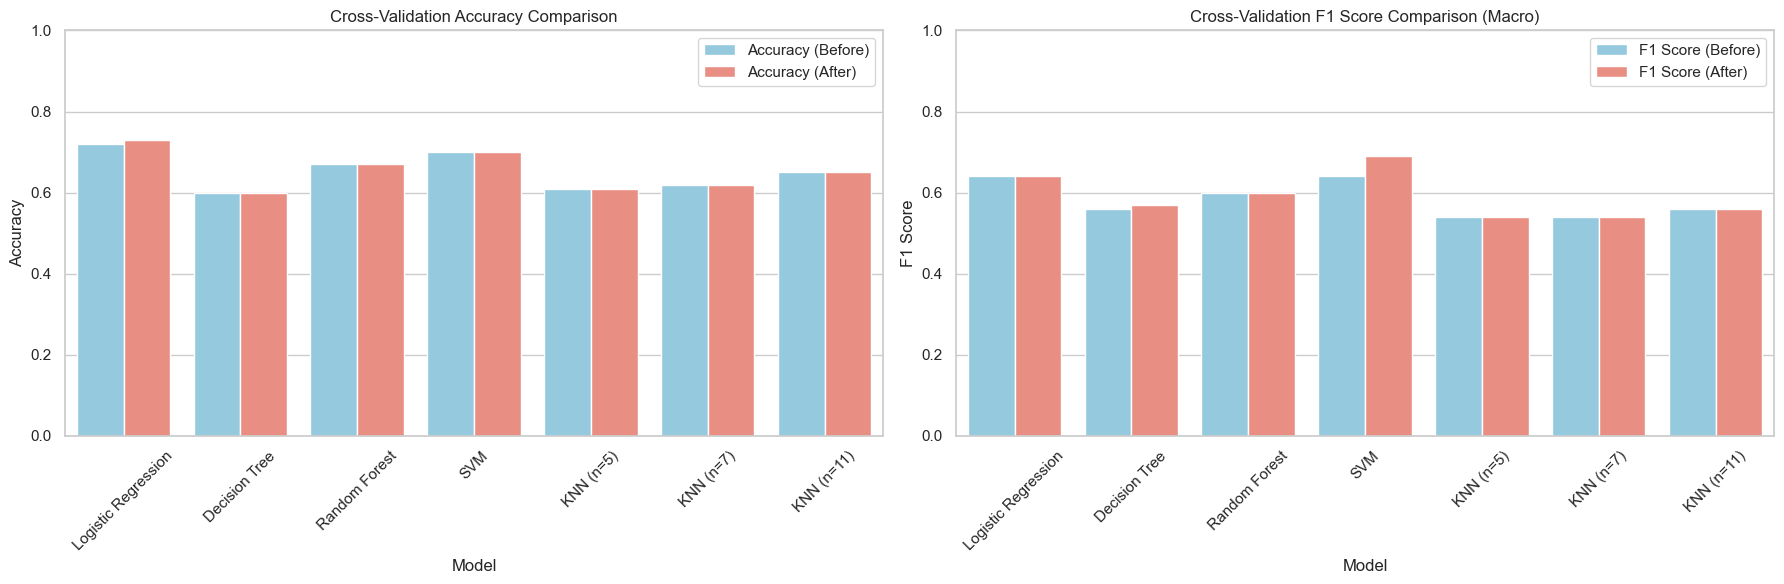

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, make_scorer, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, PerfectSeparationWarning


# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=PerfectSeparationWarning)


# --- Preprocess x and y ---
x_full = dataset.drop("test preparation course", axis=1)
y_full = dataset["test preparation course"]

# Scale numerical columns
numerical_cols = ['math score', 'reading score', 'writing score']
scaler = StandardScaler()
x_full[numerical_cols] = scaler.fit_transform(x_full[numerical_cols])

# Encode categorical variables
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), categorical_cols)], remainder='passthrough')
x_full_encoded = pd.DataFrame(ct.fit_transform(x_full), columns=ct.get_feature_names_out())

# Encode target
le = LabelEncoder()
y_full_encoded = le.fit_transform(y_full)

x = x_full_encoded
y = y_full_encoded

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

# Class weights
from collections import Counter
class_counts = Counter(y)
max_count = max(class_counts.values())
class_weight = {cls: max_count / count for cls, count in class_counts.items()}
print("Class weights:", class_weight)


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []

# Logistic Regression
scores_logit_before = {'accuracy': [], 'f1': []}
scores_logit_after = {'accuracy': [], 'f1': []}

print("Running CV for statsmodels Logistic Regression")

for train_idx, test_idx in skf.split(x, y):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    x_train_const = sm.add_constant(x_train, has_constant='add').astype(np.float64)
    x_test_const = sm.add_constant(x_test, has_constant='add').astype(np.float64)

    # BEFORE imbalance handling
    try:
        model = sm.Logit(y_train, x_train_const).fit(disp=0)
        prob_train = model.predict(x_train_const)

        precision, recall, thresholds = precision_recall_curve(y_train, prob_train)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        best_thresh = thresholds[np.argmax(f1_scores)]

        prob_test = model.predict(x_test_const)
        preds = (prob_test > best_thresh).astype(int)

        scores_logit_before['accuracy'].append(accuracy_score(y_test, preds))
        scores_logit_before['f1'].append(f1_score(y_test, preds, average='macro'))
    except Exception as e:
        print(f"Error Logistic Regression BEFORE imbalance: {e}")
        scores_logit_before['accuracy'].append(0)
        scores_logit_before['f1'].append(0)

    # AFTER imbalance handling
    try:
        class_0_count = np.sum(y_train == 0)
        class_1_count = np.sum(y_train == 1)
        weight_for_class_0 = class_1_count / class_0_count if class_0_count > 0 else 1.0
        fold_class_weight = {0: weight_for_class_0, 1: 1.0}

        weights = np.array([fold_class_weight[yi] for yi in y_train])

        glm_model = sm.GLM(y_train, x_train_const,
                           family=sm.families.Binomial(),
                           freq_weights=weights).fit(disp=0)

        prob_train_weighted = glm_model.predict(x_train_const)
        precision_w, recall_w, thresholds_w = precision_recall_curve(y_train, prob_train_weighted)
        f1_scores_w = 2 * (precision_w * recall_w) / (precision_w + recall_w + 1e-10)
        best_thresh_w = thresholds_w[np.argmax(f1_scores_w)]

        prob_test_weighted = glm_model.predict(x_test_const)
        preds_weighted = (prob_test_weighted > best_thresh_w).astype(int)

        scores_logit_after['accuracy'].append(accuracy_score(y_test, preds_weighted))
        scores_logit_after['f1'].append(f1_score(y_test, preds_weighted, average='macro'))
    except Exception as e:
        print(f"Error Logistic Regression AFTER imbalance: {e}")
        scores_logit_after['accuracy'].append(0)
        scores_logit_after['f1'].append(0)

cv_results.append({
    'Model': 'Logistic Regression',
    'Accuracy (Before)': np.mean(scores_logit_before['accuracy']),
    'Accuracy (After)': np.mean(scores_logit_after['accuracy']),
    'F1 Score (Before)': np.mean(scores_logit_before['f1']),
    'F1 Score (After)': np.mean(scores_logit_after['f1'])
})

# Other Models
print("\nRunning CV for scikit-learn Models")

class_weight_dict = {0: 642 / 358, 1: 1}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'KNN (n=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (n=7)': KNeighborsClassifier(n_neighbors=7),
    'KNN (n=11)': KNeighborsClassifier(n_neighbors=11)
}

scoring = {'accuracy': make_scorer(accuracy_score), 'f1_macro': make_scorer(f1_score, average='macro')}

for name, model in models.items():
    print(f"Performing cross-validation for: {name}")
    try:
        scores_unweighted = cross_validate(model, x, y, cv=skf, scoring=scoring)
    except Exception as e:
        print(f"Error during CV for {name} (Before): {e}")
        scores_unweighted = {'test_accuracy': [0]*n_splits, 'test_f1_macro': [0]*n_splits}

    if 'class_weight' in model.get_params() and 'KNN' not in name:
        try:
            model_weighted = model.__class__(random_state=42, class_weight=class_weight_dict)
            scores_weighted = cross_validate(model_weighted, x, y, cv=skf, scoring=scoring)
        except Exception as e:
            print(f"Error during CV for {name} (After): {e}")
            scores_weighted = {'test_accuracy': [0]*n_splits, 'test_f1_macro': [0]*n_splits}
    else:
        scores_weighted = scores_unweighted

    cv_results.append({
        'Model': name,
        'Accuracy (Before)': scores_unweighted['test_accuracy'].mean(),
        'Accuracy (After)': scores_weighted['test_accuracy'].mean(),
        'F1 Score (Before)': scores_unweighted['test_f1_macro'].mean(),
        'F1 Score (After)': scores_weighted['test_f1_macro'].mean()
    })

cv_df = pd.DataFrame(cv_results)
cv_df.iloc[:, 1:] = cv_df.iloc[:, 1:].round(2)

print("\nCross-Validated Model Comparison:\n")
print(cv_df.to_string(index=False))

# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
df_acc = cv_df.melt(id_vars='Model', value_vars=['Accuracy (Before)', 'Accuracy (After)'], 
                    var_name='Condition', value_name='Accuracy')
df_acc['Accuracy'] = df_acc['Accuracy'].astype(float)
sns.barplot(data=df_acc, x='Model', y='Accuracy', hue='Condition', palette=['skyblue', 'salmon'])
plt.title('Cross-Validation Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='')

plt.subplot(1, 2, 2)
df_f1 = cv_df.melt(id_vars='Model', value_vars=['F1 Score (Before)', 'F1 Score (After)'], 
                  var_name='Condition', value_name='F1 Score')
df_f1['F1 Score'] = df_f1['F1 Score'].astype(float)
sns.barplot(data=df_f1, x='Model', y='F1 Score', hue='Condition', palette=['skyblue', 'salmon'])
plt.title('Cross-Validation F1 Score Comparison (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='')

plt.tight_layout()
plt.show()

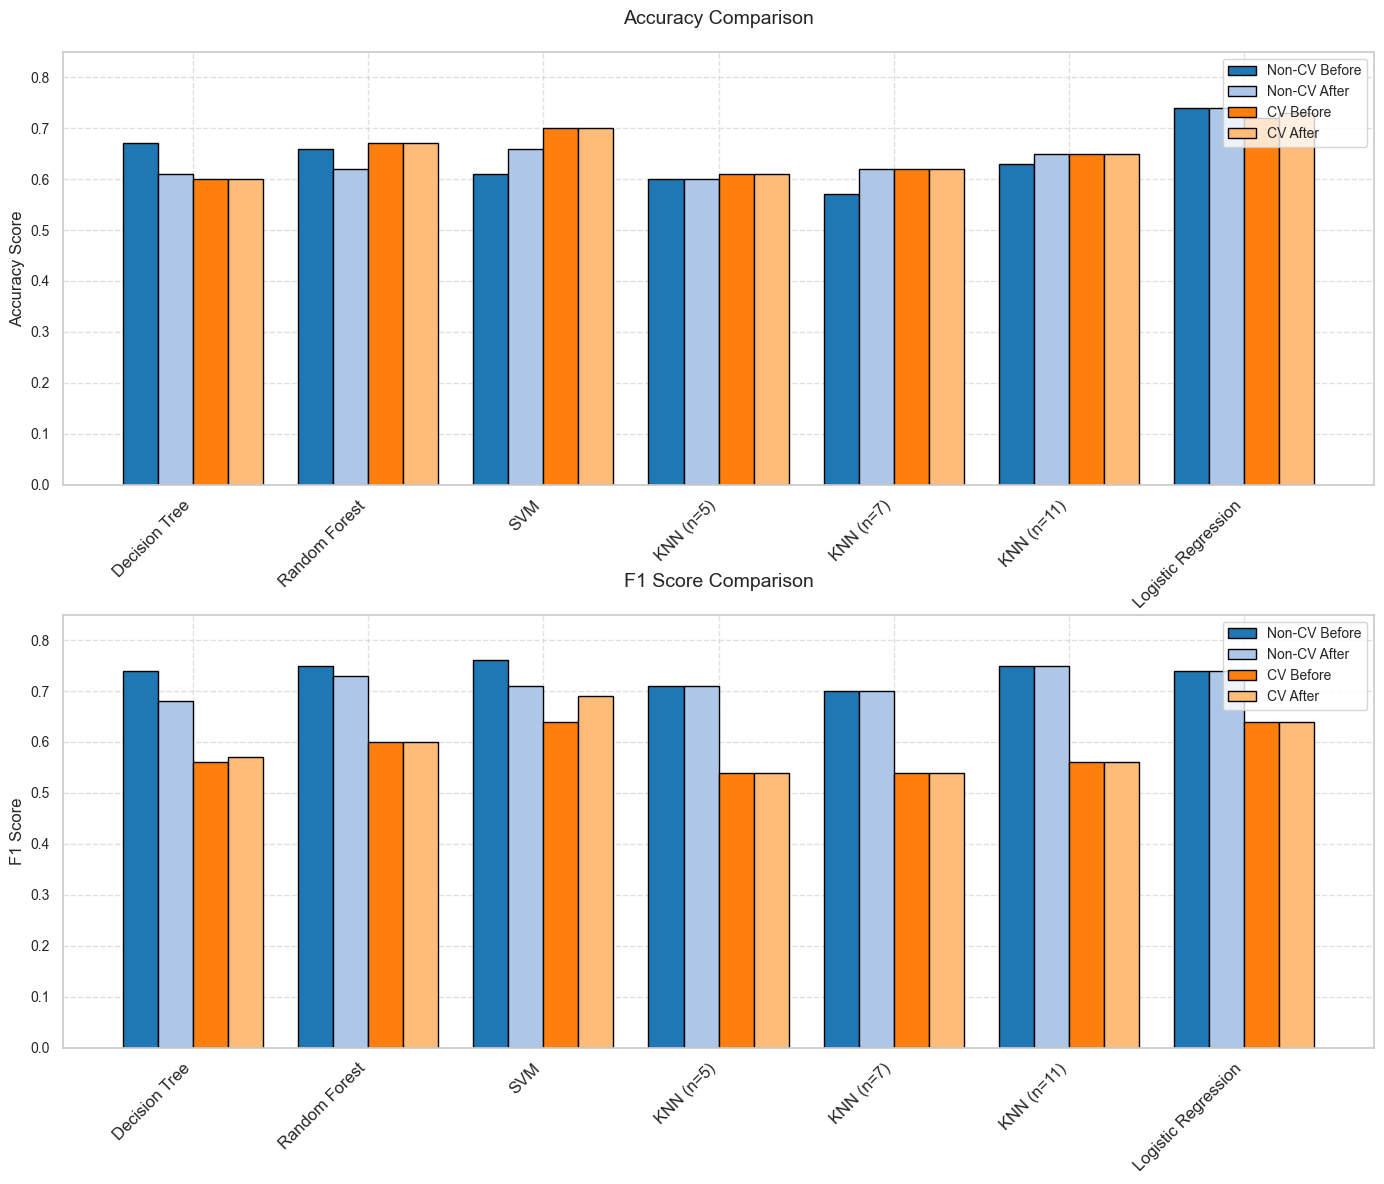

In [47]:
models = ['Decision Tree', 'Random Forest', 'SVM', 'KNN (n=5)', 'KNN (n=7)', 'KNN (n=11)', 'Logistic Regression']
metrics = ['Accuracy', 'F1 Score']

# Non-CV data
non_cv_acc_before = [0.67, 0.66, 0.61, 0.60, 0.57, 0.63, 0.74]
non_cv_acc_after = [0.61, 0.62, 0.66, 0.60, 0.62, 0.65, 0.74]
non_cv_f1_before = [0.74, 0.75, 0.76, 0.71, 0.70, 0.75, 0.74]
non_cv_f1_after = [0.68, 0.73, 0.71, 0.71, 0.70, 0.75, 0.74]

# CV data
cv_acc_before = [0.60, 0.67, 0.70, 0.61, 0.62, 0.65, 0.72]
cv_acc_after = [0.60, 0.67, 0.70, 0.61, 0.62, 0.65, 0.73]
cv_f1_before = [0.56, 0.60, 0.64, 0.54, 0.54, 0.56, 0.64]
cv_f1_after = [0.57, 0.60, 0.69, 0.54, 0.54, 0.56, 0.64]

# Visualization
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Accuracy plot
ax[0].bar(x - width*1.5, non_cv_acc_before, width, label='Non-CV Before', color='#1f77b4', edgecolor='black')
ax[0].bar(x - width*0.5, non_cv_acc_after, width, label='Non-CV After', color='#aec7e8', edgecolor='black')
ax[0].bar(x + width*0.5, cv_acc_before, width, label='CV Before', color='#ff7f0e', edgecolor='black')
ax[0].bar(x + width*1.5, cv_acc_after, width, label='CV After', color='#ffbb78', edgecolor='black')
ax[0].set_title('Accuracy Comparison', fontsize=14, pad=20)
ax[0].set_ylabel('Accuracy Score', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(models, rotation=45, ha='right', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

# F1 Score plot
ax[1].bar(x - width*1.5, non_cv_f1_before, width, label='Non-CV Before', color='#1f77b4', edgecolor='black')
ax[1].bar(x - width*0.5, non_cv_f1_after, width, label='Non-CV After', color='#aec7e8', edgecolor='black')
ax[1].bar(x + width*0.5, cv_f1_before, width, label='CV Before', color='#ff7f0e', edgecolor='black')
ax[1].bar(x + width*1.5, cv_f1_after, width, label='CV After', color='#ffbb78', edgecolor='black')
ax[1].set_title('\n\nF1 Score Comparison', fontsize=14, pad=20)
ax[1].set_ylabel('F1 Score', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(models, rotation=45, ha='right', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

# Common settings
for axis in ax:
    axis.set_ylim(0, 0.85)
    axis.legend(loc='upper right', fontsize=10)
    axis.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

### Manual Prediction

In [48]:
print("Enter student as instructed below:")
print("[gender, race/ethnicity, parental level of education, lunch, math score, reading score, writing score]\n\n")

raw_input = input("Enter student data: ").strip().split(',')

if len(raw_input) != 7:
    raise ValueError("You must enter exactly 7 values.")

input_clean = [val.strip() for val in raw_input]

new_student_dataset = pd.DataFrame([input_clean], columns=[
    'gender', 'race/ethnicity', 'parental level of education', 'lunch',
    'math score', 'reading score', 'writing score'
])

new_student_dataset[['math score', 'reading score', 'writing score']] = new_student_dataset[
    ['math score', 'reading score', 'writing score']
].astype(float)

new_student_encoded = pd.DataFrame(
    ct.transform(new_student_dataset),
    columns=ct.get_feature_names_out()
)

new_student_opt = sm.add_constant(new_student_encoded, has_constant='add')

print("Your Input: ", raw_input)

# BEFORE imbalance (threshold = 0.76)
prob_none_before = model_train.predict(new_student_opt)[0]
prob_completed_before = 1 - prob_none_before
pred_before = int(prob_none_before > 0.76)

# AFTER imbalance (threshold = 0.64)
prob_none_after = model_train_weights.predict(new_student_opt)[0]
prob_completed_after = 1 - prob_none_after
pred_after = int(prob_none_after > 0.64)

# ---- Output ----
label_map = {0: 'completed', 1: 'none'}

print("\nPrediction Results:")
print(f"\nBEFORE imbalance handling (Threshold: 0.76):")
print(f"Probability of COMPLETED: {prob_completed_before:.2f}")
print(f"Probability of NONE     : {prob_none_before:.2f}")
print(f"Final Prediction     : {label_map[pred_before]} (since prob_none = {prob_none_before:.2f} {'>' if prob_none_before > 0.76 else '<='} 0.76)")


print(f"\n\nAFTER imbalance handling (Threshold: 0.64):")
print(f"Probability of COMPLETED: {prob_completed_after:.2f}")
print(f"Probability of NONE     : {prob_none_after:.2f}")
print(f"Final Prediction     : {label_map[pred_before]} (since prob_none = {prob_none_before:.2f} {'>' if prob_none_before > 0.64 else '<='} 0.64)")



Enter student as instructed below:
[gender, race/ethnicity, parental level of education, lunch, math score, reading score, writing score]


Your Input:  ['male', ' group C', " associate's degree", ' free/reduced', ' 42', ' 90', ' 58']

Prediction Results:

BEFORE imbalance handling (Threshold: 0.76):
Probability of COMPLETED: 0.08
Probability of NONE     : 0.92
Final Prediction     : none (since prob_none = 0.92 > 0.76)


AFTER imbalance handling (Threshold: 0.64):
Probability of COMPLETED: 0.12
Probability of NONE     : 0.88
Final Prediction     : none (since prob_none = 0.92 > 0.64)
